In [1]:
# # !mkdir ../checkpoints
# !wget https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ./checkpoints

In [2]:
import mmcv   # location: /gruntdata0/xinting/anaconda3/envs/open-mmlab/lib/python3.7/site-packages/mmcv

In [3]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [4]:
# name = []
# with open('names.txt') as f:
#     for line in f.readlines():
#         line = line.split(': ')
#         name.append(line[-1][:-1])
# name.insert(0, 'background')

In [5]:
config_file = './configs/SETR/SETR_MLA_480x480_80k_pascal_context_bs_8.py'
checkpoint_file = './checkpoints/SETR_MLA_pascal_context_b8_80k.pth'

# config_file = './configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'
# checkpoint_file = './checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'


In [6]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

load pre-trained weight from imagenet21k


In [7]:
model.test_cfg

{'mode': 'whole'}

In [8]:
# test a single image
img = './demo/2010_006079.jpg'
# img = './demo/demo.png'
result = inference_segmentor(model, img)

> /gruntdata3/xinting/project/SETR/mmseg/models/segmentors/encoder_decoder.py(80)extract_feat()
     78         """Extract features from images."""
     79         import pdb; pdb.set_trace()
---> 80         x = self.backbone(img)
     81         import pdb; pdb.set_trace()
     82         if self.with_neck:

ipdb> c
> /gruntdata3/xinting/project/SETR/mmseg/models/backbones/vit_mla.py(452)forward()
    450         for i in range(B):
    451             import pdb; pdb.set_trace()
--> 452             index_patches = numpy.arange(x.shape[1])
    453             numpy.random.seed(0)
    454             numpy.random.shuffle(index_patches)

ipdb> c
> /gruntdata3/xinting/project/SETR/mmseg/models/segmentors/encoder_decoder.py(82)extract_feat()
     80         x = self.backbone(img)
     81         import pdb; pdb.set_trace()
---> 82         if self.with_neck:
     83             x = self.neck(x)
     84         return x

ipdb> c
> /gruntdata3/xinting/project/SETR/mmseg/models/segmentors/enco

In [12]:
gt  = mmcv.imread('./demo/2010_006079.png')

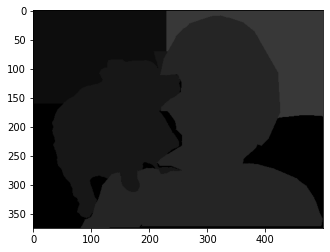

In [14]:
matplotlib.pyplot.imshow(gt)

In [8]:
import torch
torch.tensor(mmcv.imread(img)).size()

torch.Size([375, 500, 3])

In [9]:
torch.tensor(result[0]).size()

torch.Size([375, 500])

/gruntdata3/xinting/project/SETR/mmseg/models/segmentors/base.py:268: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


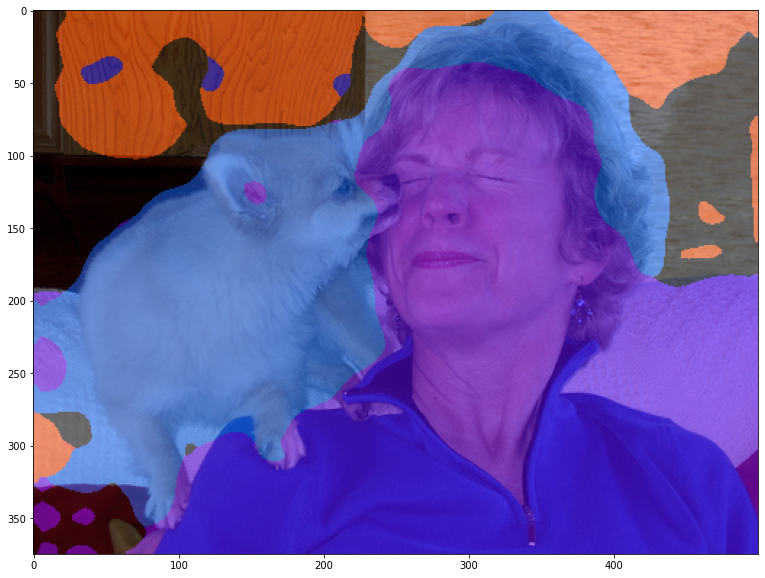

In [9]:
# show the results
show_result_pyplot(model, img, result, get_palette('voccontext'))

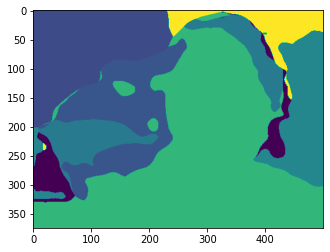

In [9]:
import matplotlib, torch
matplotlib.pyplot.imshow(torch.tensor(result)[0].numpy())

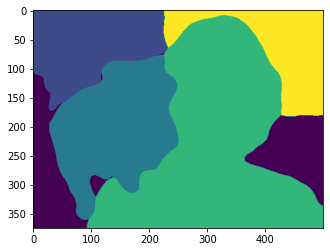

In [10]:
import matplotlib, torch
matplotlib.pyplot.imshow(torch.tensor(result)[0].numpy())

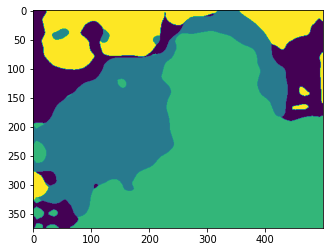

In [9]:
import matplotlib, torch
matplotlib.pyplot.imshow(torch.tensor(result)[0].numpy())

In [24]:
for i in set(result[0].flatten()):
    print(name[i])

background
ground
rock
track
building
computer
cup
door


In [26]:
set(result[0].flatten())

{0, 25, 29, 30, 31, 37, 47, 53}